<a href="https://colab.research.google.com/github/bparkerlayton/AIHC-5010-Intro-to-Machine-Learning/blob/main/AIHC_5010_HW_1_Resubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Task: Create a Jupyter notebook that implements a perceptron and trains the model on an example dataset
#   Dataset 1: a linearly separable dataset
#   Dataset 2: a model of the XOR problem
#   Extra credit: create a simple model that can be trained to solve XOR

### Create a Linearly Separable Dataset

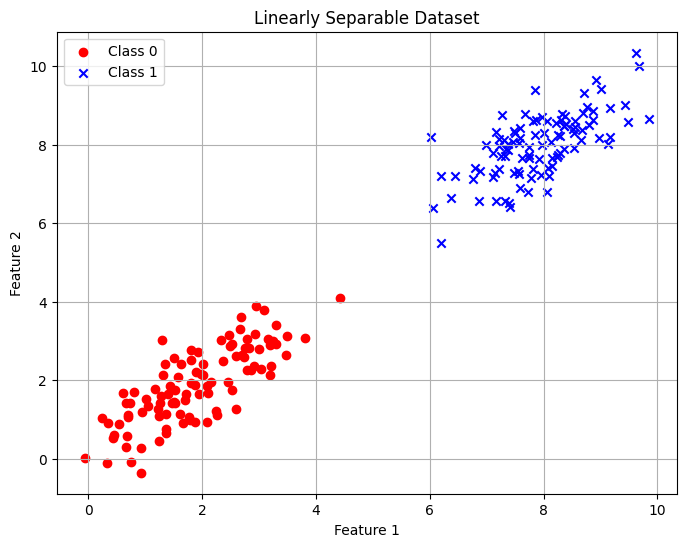

Dataset created with 200 data points.
Number of points in Class 0: 100
Number of points in Class 1: 100


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points per group
num_points = 100

# Generate data for Group 1 (Class 0)
# Centered around (2, 2) with some spread
mean1 = [2, 2]
cov1 = [[0.8, 0.6], [0.6, 0.8]]
X1 = np.random.multivariate_normal(mean1, cov1, num_points)
y1 = np.zeros(num_points) # Label for Class 0

# Generate data for Group 2 (Class 1)
# Centered around (8, 8) with some spread, ensuring linear separability
mean2 = [8, 8]
cov2 = [[0.8, 0.6], [0.6, 0.8]]
X2 = np.random.multivariate_normal(mean2, cov2, num_points)
y2 = np.ones(num_points) # Label for Class 1

# Combine the datasets
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Visualize the dataset to confirm linear separability
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

print(f"Dataset created with {len(X)} data points.")
print(f"Number of points in Class 0: {np.sum(y == 0)}")
print(f"Number of points in Class 1: {np.sum(y == 1)}")


### Perceptron Implementation

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to -1 and 1 for perceptron learning
        # Assuming original labels are 0 and 1
        y_ = np.array([1 if i == 1 else -1 for i in y])

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Calculate the linear combination
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply activation function
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        # Convert back to 0 and 1 for consistency if needed, or keep -1, 1
        return np.array([1 if i == 1 else 0 for i in y_predicted])

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, -1)

print("Perceptron class defined.")


Perceptron class defined.


### Train and Evaluate Perceptron on Linearly Separable Dataset


Perceptron accuracy on linearly separable dataset: 0.9750


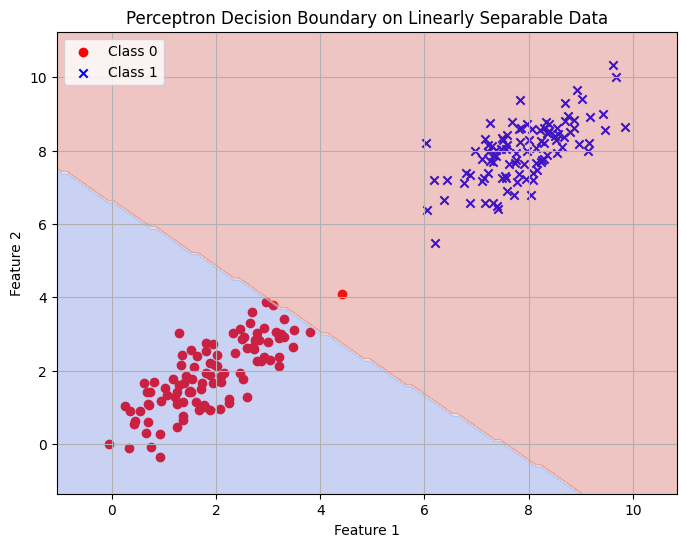

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron accuracy on linearly separable dataset: {accuracy:.4f}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title="Perceptron Decision Boundary"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary on Linearly Separable Data")


### Create a Dataset that Models the XOR Problem

XOR dataset created with 4 data points.
Input features (X_xor):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Labels (y_xor):
[0 1 1 0]


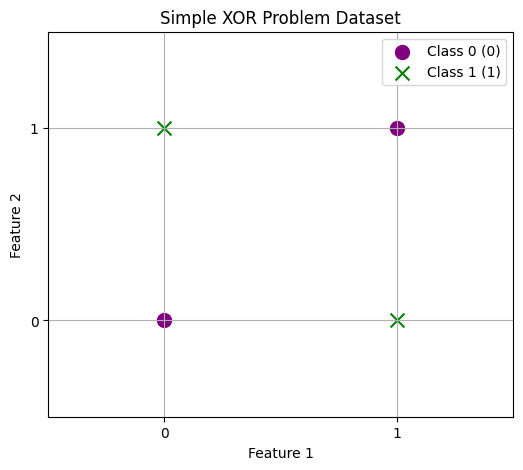

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the four points for the XOR problem
X_xor = np.array([
    [0, 0], # Input 1
    [0, 1], # Input 2
    [1, 0], # Input 3
    [1, 1]  # Input 4
])

# Define the corresponding XOR outputs
y_xor = np.array([
    0, # (0 XOR 0) = 0
    1, # (0 XOR 1) = 1
    1, # (1 XOR 0) = 1
    0  # (1 XOR 1) = 0
])

print(f"XOR dataset created with {len(X_xor)} data points.")
print(f"Input features (X_xor):\n{X_xor}")
print(f"Labels (y_xor):\n{y_xor}")

# Visualize the XOR dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], color='purple', marker='o', s=100, label='Class 0 (0)')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], color='green', marker='x', s=100, label='Class 1 (1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simple XOR Problem Dataset')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

### Train and Evaluate Perceptron on a Dataset that Models the XOR Problem

Perceptron accuracy on XOR dataset: 0.0000


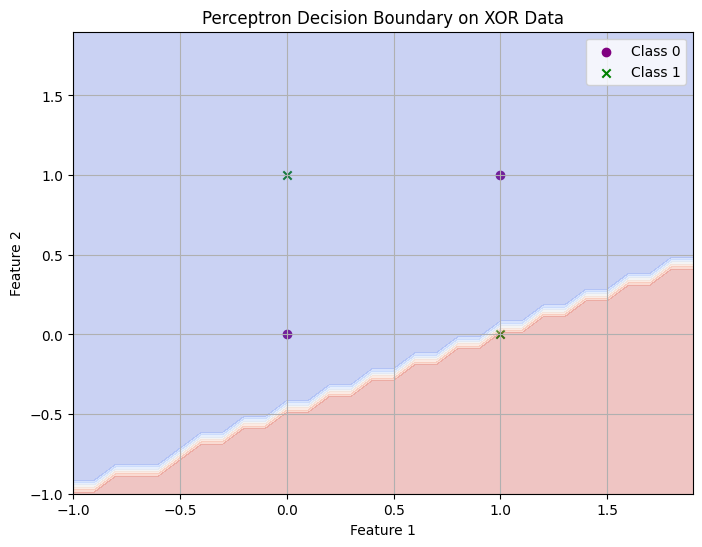

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.2, random_state=42)

# Instantiate and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron accuracy on XOR dataset: {accuracy:.4f}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title="Perceptron Decision Boundary"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', marker='x', label='Class 1')

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_xor, y_xor, perceptron, title="Perceptron Decision Boundary on XOR Data")

# What minor changes to the perceptron/model could be made to solve XOR?

A single perceptron, as implemented above, can only learn linearly separable patterns. Since the XOR problem is not linearly separable, we achieved a low accuracy using the single perceptron.

To solve the XOR problem, we could introduce at least one hidden layer with non-linear activation functions. This would transform the simple perceptron into a Multi-Layer Perceptron, a type of neural network.

Below is a multi-layered perceptron with non-linear activation functions is implemented to solve the XOR problem.

There was some difficulty because of the small size of the dataset (only 4 points), but with some edits the MLP has now achieved an accuracy of 100%.

### Extra Credit: Solving XOR with a Multi-Layer Perceptron (Neural Network)

In [34]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, n_iterations=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        # Initialize weights and biases
        # Weights from input to hidden layer
        # Removed * 0.01 to allow larger initial weights, which can help with convergence for XOR
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))

        # Weights from hidden to output layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        # Derivative of sigmoid where x is the sigmoid output
        return x * (1 - x)

    def fit(self, X, y):
        y = y.reshape(-1, 1) # Reshape y to be a column vector

        for _ in range(self.n_iterations):
            # Forward pass
            hidden_layer_input = np.dot(X, self.W1) + self.b1
            hidden_layer_output = self._sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.W2) + self.b2
            predicted_output = self._sigmoid(output_layer_input)

            # Backward pass (Backpropagation)
            # Output layer error
            error_output = y - predicted_output
            d_predicted_output = error_output * self._sigmoid_derivative(predicted_output)

            # Hidden layer error
            error_hidden = np.dot(d_predicted_output, self.W2.T)
            d_hidden_layer = error_hidden * self._sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            self.W2 += np.dot(hidden_layer_output.T, d_predicted_output) * self.learning_rate
            self.b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
            self.W1 += np.dot(X.T, d_hidden_layer) * self.learning_rate
            self.b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.W1) + self.b1
        hidden_layer_output = self._sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.W2) + self.b2
        predicted_output = self._sigmoid(output_layer_input)

        return (predicted_output > 0.5).astype(int).flatten()

print("NeuralNetwork class defined.")

NeuralNetwork class defined.


### Train and Evaluate Neural Network on XOR Dataset

Neural Network accuracy on XOR dataset (full dataset): 1.0000


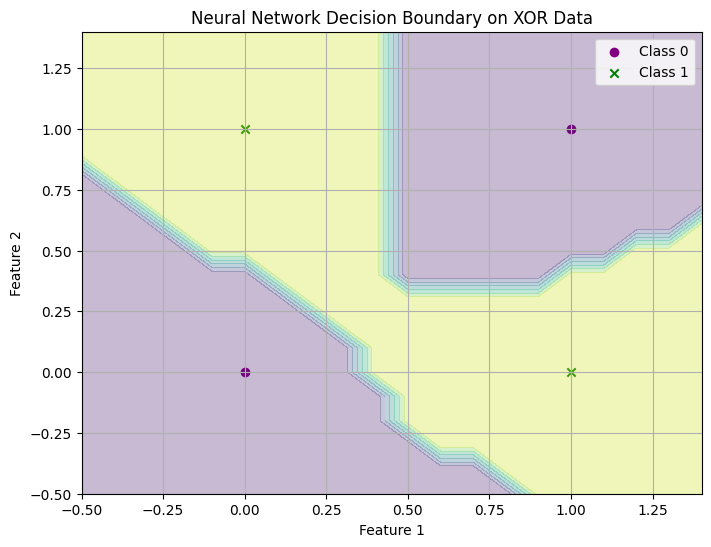

In [35]:
from sklearn.metrics import accuracy_score

# Instantiate and train the Neural Network
# Input size = 2 (features), Hidden size = 4 (can be tuned), Output size = 1 (binary classification)
nn_xor = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1, n_iterations=10000)
nn_xor.fit(X_xor, y_xor) # Train on the entire XOR dataset

# Make predictions on the XOR dataset (all points)
y_xor_nn_pred = nn_xor.predict(X_xor)

# Calculate accuracy for XOR with Neural Network
accuracy_xor_nn = accuracy_score(y_xor, y_xor_nn_pred)
print(f"Neural Network accuracy on XOR dataset (full dataset): {accuracy_xor_nn:.4f}")

# Visualize the decision boundary for XOR with Neural Network
# We'll need a slightly modified plot_decision_boundary for the NN as its predict returns 0/1 directly
def plot_nn_decision_boundary(X, y, model, title="Neural Network Decision Boundary"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', marker='x', label='Class 1')

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_nn_decision_boundary(X_xor, y_xor, nn_xor, title="Neural Network Decision Boundary on XOR Data")